In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
import matplotlib.pyplot as plt
import os
import cv2
import PIL 
import numpy as np
import random

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
train=[]
trainlab=[]
os.chdir(r"/content/drive/MyDrive/Mart/masked_dataset/i/im_train")
for i in os.listdir():
    #image=cv2.imread()
    image = np.array(PIL.Image.open(i))
    train.append(image)
    trainlab.append(1)
os.chdir(r"/content/drive/MyDrive/Mart/masked_dataset/iii/im_train")
for i in os.listdir():
    #image=cv2.imread()
    image = np.array(PIL.Image.open(i))
    train.append(image)
    trainlab.append(2)

train_images=np.array(train)

train_images.shape
train_labels=np.array(trainlab)
train_labels.shape

(775,)

In [21]:
test=[]
testlab=[]
os.chdir(r"/content/drive/MyDrive/Mart/masked_dataset/i/im_val")
for i in os.listdir():
    #image=cv2.imread()
    image = np.array(PIL.Image.open(i))
    test.append(image)
    testlab.append(1)
os.chdir(r"/content/drive/MyDrive/Mart/masked_dataset/iii/im_val")
for i in os.listdir():
    #image=cv2.imread()
    image = np.array(PIL.Image.open(i))
    test.append(image)
    testlab.append(2)

test_images=np.array(test)
test_images.shape
test_labels=np.array(testlab)
test_labels.shape

(52,)

In [22]:
# train_images, test_images = train_images / 255.0, test_images / 255.0

In [23]:
# (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# # Normalize pixel values to be between 0 and 1
# # train_images, test_images = train_images / 255.0, test_images / 255.0
# print(train_images.shape)

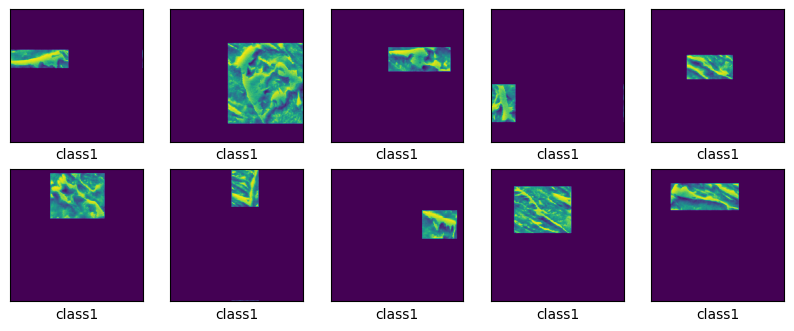

In [24]:
#class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
class_names = ['class1','class2']
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]-1])
plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 1),kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 510, 510, 32)      320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 255, 255, 32)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 255, 255, 32)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 126, 126, 64)     

In [28]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 510, 510, 32)      320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 255, 255, 32)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 255, 255, 32)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 126, 126, 64)     

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
# from tensorflow.keras import regularizers
# from tensorflow.keras.constraints import max_norm
# model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_constraint=max_norm(3), kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.Dropout(0.25))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_constraint=max_norm(3), kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.25))
# model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_constraint=max_norm(3), kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.25))
# model.add(layers.Dense(256, activation='relu', kernel_initializer='he_normal', kernel_constraint=max_norm(3), kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.Dropout(0.5))

In [32]:
history= model.fit(train_images, train_labels, batch_size=25, epochs=3, validation_data=(test_images, test_labels))

Epoch 1/3
31/31 [==============================] - 736s 23s/step - loss: -11493173.0000 - accuracy: 0.5935 - val_loss: -119108152.0000 - val_accuracy: 0.3462
Epoch 2/3
11/31 [=========>....................] - ETA: 6:57 - loss: -231017328.0000 - accuracy: 0.5745

KeyboardInterrupt: ignored

Epoch 1/10
25/25 [==============================] - 461s 18s/step - loss: -2392951.7500 - accuracy: 0.5961 - val_loss: -14365012.0000 - val_accuracy: 0.3462
Epoch 2/10
25/25 [==============================] - 452s 18s/step - loss: -40793320.0000 - accuracy: 0.5961 - val_loss: -165807024.0000 - val_accuracy: 0.3462
Epoch 3/10
25/25 [==============================] - 447s 18s/step - loss: -275506240.0000 - accuracy: 0.5961 - val_loss: -873073408.0000 - val_accuracy: 0.3462
Epoch 4/10
25/25 [==============================] - 452s 18s/step - loss: -1131915136.0000 - accuracy: 0.5961 - val_loss: -2951913216.0000 - val_accuracy: 0.3462



Epoch 1/3
31/31 [==============================] - 736s 23s/step - loss: -11493173.0000 - accuracy: 0.5935 - val_loss: -119108152.0000 - val_accuracy: 0.3462
Epoch 2/3
11/31 [=========>....................] - ETA: 6:57 - loss: -231017328.0000 - accuracy: 0.5745

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)